In [1]:
# Import External Packages
import scipy.stats as scs
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Importing Custom Functions
import clusteringFns as clf
import plotFns as psyplt

# Setting Seed for Reproducibility
np.random.seed(2021)

curPath = os.path.abspath(os.getcwd())

In [3]:
# Transforming trajectories for visualization and clustering

IDs = ('GS027', 'GS028', 'GS029', 'GS030', 'GS037', 'GS040', 'JC025', 'JC028', 
       'JC029', 'JC039', 'JC044', 'JC047', 'JC048', 'JC052', 'JC057', 'JC059', 
       'JC061', 'JC062', 'JC067')

dataBase =  os.path.abspath(os.path.join(curPath,"data/Trajectories/with_bias_learning"))

nPoints = 100

signedTraceMatResized, avgTraceMatResized = clf.generateTraceMats(IDs, dataBase, nPoints = nPoints)

ids = np.array(['JC067', 'GS029', 'JC057', 'JC044', 'JC025',  'GS030', 'GS028', 'JC061', 'JC048', 'JC052', 'GS027',
                'JC028', 'JC062', 'JC029', 'GS040', 'JC039','GS037',  'JC059', 'JC047'])

rm = []

x_pred = np.array(range(0,len(ids)))

Xp = avgTraceMatResized.drop(rm)

Xp = np.asarray(Xp)
XpD = pd.DataFrame(Xp,index = IDs)
XpD = XpD.loc[ids]
Xp = np.asarray(XpD)

test = 'slope'
nPointsTemp = int(np.round(nPoints))

df = XpD.iloc[:,0:nPointsTemp].copy()
df[['slope','intercept','r','p','se']] = df.apply(lambda x: linregress(range(1,len(x.dropna())+1), x.dropna().values), axis=1).apply(pd.Series)

print(df[['slope','intercept','r','p','se']])

df['label'] = [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1]

dfc = df.copy()

dfc_1 = dfc.loc[dfc['label'] == 1,:]
dfc_1 = dfc_1.sort_values(test, ascending = False)

dfc_0 = dfc.loc[dfc['label'] == 0,:]
dfc_0 = dfc_0.sort_values(test, ascending = False)
dfc = pd.concat([dfc_0, dfc_1],axis = 0)

ordered = np.array(dfc.index)

          slope  intercept         r             p        se
JC067 -0.001147   0.788441 -0.400115  3.715096e-05  0.000265
GS029  0.000812   0.628124  0.553643  2.308340e-09  0.000123
JC057  0.001405   0.545707  0.622984  4.478843e-12  0.000178
JC044 -0.001319   0.683919 -0.422163  1.214988e-05  0.000286
JC025  0.000525   0.530478  0.333139  7.071439e-04  0.000150
GS030 -0.001135   0.637607 -0.691569  1.643263e-15  0.000120
GS028  0.000686   0.507375  0.443065  3.907450e-06  0.000140
JC061 -0.001503   0.650980 -0.491277  2.104278e-07  0.000269
JC048  0.000045   0.538832  0.020278  8.412876e-01  0.000222
JC052 -0.002137   0.651593 -0.459981  1.474381e-06  0.000417
GS027 -0.000075   0.565337 -0.025631  8.001679e-01  0.000294
JC028 -0.001453   0.549626 -0.717962  4.225372e-17  0.000142
JC062 -0.000936   0.512043 -0.336746  6.130999e-04  0.000264
JC029 -0.002630   0.572778 -0.820195  1.660550e-25  0.000185
GS040  0.000227   0.451519  0.064627  5.229457e-01  0.000355
JC039 -0.003232   0.6101

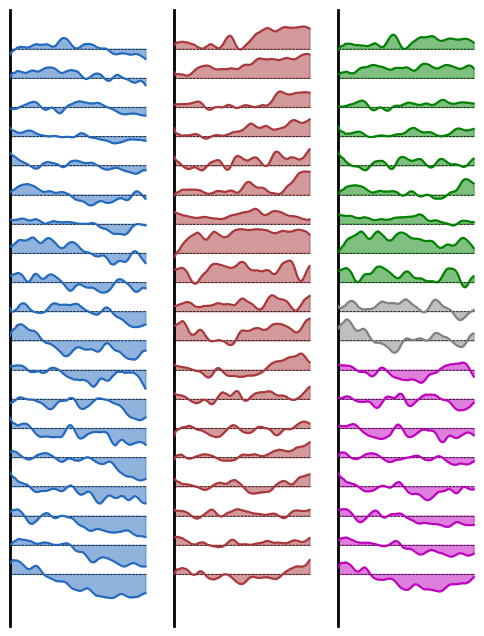

In [8]:
# Figure 3A

ids = ordered
Xp = signedTraceMatResized.drop(rm)
Xp = Xp.loc[ids]
Xp = np.array(Xp)

Xp_avg = avgTraceMatResized.drop(rm)
Xp_avg = Xp_avg.loc[ids]
Xp_avg = np.array(Xp_avg)

x_pred = [0,0,0,0,0,0,0,0,0,2,2,1,1,1,1,1,1,1,1]

fig, axs = psyplt.plotClustersVertThreeAx(Xp, Xp_avg, x_pred, nPointsTemp)

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)

for ax in axs:

    ax.spines[['right', 'top','bottom']].set_visible(False)
    ax.spines[['left', 'bottom']].set_linewidth(2)
    ax.set_xlim(0,100)
    ax.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        left = False,
        labelbottom=False,
        labelleft=False) # labels along the bottom edge are off
    plt.setp(axs, ylim=axs[0].get_ylim())

fig.set_size_inches(6,8)

plt.show()

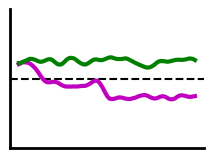

In [9]:
# Figure 3B

x_pred = pd.DataFrame([0,0,0,0,0,0,0,0,0,2,2,1,1,1,1,1,1,1,1])

fig, ax = psyplt.plotClustersVertAvgOnly(Xp_avg, x_pred[0], nPointsTemp)

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)

ax.spines[['right', 'top']].set_visible(False)
ax.spines[['left', 'bottom']].set_linewidth(2)

ax.set_ylim(0.1,0.9)
ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left = False,
    labelbottom=False,
    labelleft=False) # labels along the bottom edge are off

fig.set_size_inches(2.5,1.8)

plt.show()

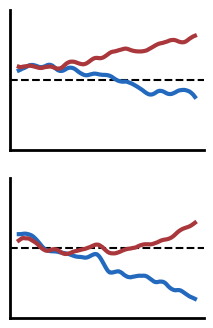

In [10]:
# Figure 3C-D

ids = ordered
Xp = signedTraceMatResized.drop(rm)
Xp = Xp.loc[ids]
Xp = np.array(Xp)

x_pred = pd.DataFrame([0,0,0,0,0,0,0,0,0,2,2,1,1,1,1,1,1,1,1])

fig, axs = psyplt.plotClustersVert(Xp, x_pred[0], nPoints)

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)

for ax in axs:

    ax.spines[['right', 'top']].set_visible(False)
    ax.spines[['left', 'bottom']].set_linewidth(2)
    ax.set_ylim(-0.05,1.05)
    ax.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        left = False,
        labelbottom=False,
        labelleft=False) # labels along the bottom edge are off

fig.set_size_inches(2.5,4)

plt.show()
